# Projeto Mineração - Dados Abertos UFRN



In [3]:
#hide
import pandas as pd
import numpy as np

projetos = pd.read_csv("http://dados.ufrn.br/dataset/e48162fa-0668-4098-869a-8aacfd177f9f/resource/3f12a9a4-7084-43e7-a4ac-091a8ae14020/download/projetos-de-pesquisa.csv", sep=';')
bolsistas = pd.read_csv("http://dados.ufrn.br/dataset/81608a4d-c76b-4758-a8d8-54be32209833/resource/d21c94fe-22ba-4cf3-89db-54d8e739c567/download/bolsas-iniciacao-cientifica.csv", sep=';')

In [5]:
#hide
bolsistas_categoria = bolsistas.groupby('categoria', as_index=False).agg({"discente": "count"})
#print(bolsistas_categoria)

bolsistas_tipo = bolsistas.groupby('tipo_de_bolsa', as_index=False).agg({"discente" : "count"})
#print(bolsistas_tipo)

bolsistas_status = bolsistas.groupby('status', as_index=False).agg({"codigo_projeto": "count"})
#print(bolsistas_status)

bolsistas_ano = bolsistas.groupby('ano', as_index=False).agg({"discente": "count"})
#print(bolsistas_ano)

grupo_projetos = bolsistas.groupby("id_projeto_pesquisa")
#print(grupo_projetos)

projetos_situacao = projetos.groupby('situacao', as_index=False).agg({"codigo_projeto":"count"})
#print(projetos_situacao)

projetos_categoria = projetos.groupby('categoria_projeto', as_index=False).agg({"codigo_projeto":"count"})
#print(projetos_categoria)

projetos_unidades = projetos.groupby('unidade', as_index=False).agg({"codigo_projeto":"count"})
#print(projetos_unidades)

In [6]:
#hide
projetos.drop(columns=['data_inicio', 'data_fim', 'id_coordenador', 'coordenador', 'edital', 'objetivos_desenvolvimento_sustentavel', 'id_grupo_pesquisa', 'grupo_pesquisa'])
bolsistas.drop(columns=['id_grupo_pesquisa', 'grupo_pesquisa', 'fim' ])
#13
#17

,id_discente,matricula,discente,titulo,codigo_projeto,id_projeto_pesquisa,ano,id_orientador,orientador,categoria,tipo_de_bolsa,linha_pesquisa,cota,inicio,id_unidade,unidade,status
0,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,ELEMENTOS DO COMPORTAMENTO ORGANIZACIONAL:Tipo...,PVE513-2008,5487590,2008,23198,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Gestão de Organizações Sociais;Trabalho Volunt...,2008-2009,2008/11/06 00:00:00.000,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
1,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,Geração e disseminação da inovação na carcinic...,PVE2463-2008,5554243,2008,64653,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional,2008-2009,2008/08/25 00:00:00.000,161,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO
2,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2007,1179265,2007,64653,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional;;;,2007-2008,2007/08/01 00:00:00.000,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
3,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,Motivos de Adesão e Filiação ao Trabalho Volun...,PVE3275-2009,11687003,2009,23198,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Análise e Avaliação de Políticas Públicas;;;,2009-2010,2009/08/01 00:00:00.000,161,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO
4,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2006,41258,2006,64653,MARIANA BALDI,Iniciação Científica (IC),PROPESQ,Organizações e comportamento organizacional;;;,2006-2007,2006/08/01 00:00:00.000,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26722,711540,20160002306,ZILMAR CANDIDO DE SANTANA JUNIOR,Vínculos cosmológicos com dados de quasares,PIJ12992-2016,117607579,2016,5757556,PEDRO DA CUNHA FERREIRA,Iniciação Científica (IC),VOLUNTÁRIO,Cosmologia e gravitação,2017-2018,2017/08/02 00:00:00.000,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA - ECT,FINALIZADO
26723,72529,200214205,ZORAIDE BEZERRA GOMES,Impactos da operação do Estado como empregador...,PVE1495-2007,1173409,2007,26268,ANDRE LUIS CABRAL DE LOURENCO,Iniciação Científica (IC),PIBIC,Estratégias para o Desenvolvimento Regional,2007-2008,2007/07/28 00:00:00.000,160,DEPARTAMENTO DE ECONOMIA - DEPEC - DECO/CCSA,FINALIZADO
26724,538319,2009303264,ZUELITON DA SILVA ALMEIDA,CURVA DE RETENÇÃO DE ÁGUA EM NEOSSOLO QUARTZAR...,PVL6437-2010,50569684,2010,5753876,ERMELINDA MARIA MOTA OLIVEIRA,Iniciação Científica (IC),PIBIC-EM,Produção de Forragens,Ensino Médio/Técnico 2010-2012,2010/10/01 00:00:00.000,351,ESCOLA AGRÍCOLA DE JUNDIAÍ - EAJ,FINALIZADO
26725,536654,2010327302,ZUILA MOURA CAVALCANTI,AS PRÁTICAS INTEGRATIVAS EM SAÚDE E OS SERVIDO...,PID6336-2010,4918830,2010,5753559,MÉRCIA MARIA DE SANTI,Iniciação Científica (IC),PIBIC-EM,NENHUMA,Ensino Médio/Técnico 2010-2012,2010/10/01 00:00:00.000,205,ESCOLA DE SAÚDE - ES/UFRN,FINALIZADO


In [7]:
#hide
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn
from sklearn.cluster import KMeans
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report


In [8]:
#hide
import cufflinks as cf
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [9]:
#hide
anos_projetos = projetos['ano'].unique()
qtd_projetos = projetos['ano'].value_counts().to_list()

In [10]:
#hide_input
print("Tabela de Projetos:", projetos.shape)
print("Tabela de Bolsistas:", bolsistas.shape)

Tabela de Projetos: (21371, 21)
Tabela de Bolsistas: (26727, 20)


In [11]:
#hide
areas = projetos['area_conhecimento_cnpq'].unique()
np.size(areas)

923

In [12]:
#hide
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#hide
#num
#numeros

In [ ]:
#hide
file = open('/content/drive/MyDrive/projetos/areas_cnpq.csv', 'r')
lines = file.readlines()
print(lines)

['10000003,Ciências Exatas e da Terra\n', '10100008,Matemática\n', '10101004,Álgebra\n', '10101012,Conjuntos \n', '10101020,Lógica Matemática \n', '10101039,Teoria dos Números\n', '10101047,Grupos de Algebra Não-Comutaviva\n', '10101055,Algebra Comutativa\n', '10101063,Geometria Algebrica\n', '10102000,Análise\n', '10102019,Análise Complexa\n', '10102027,Análise Funcional\n', '10102035,Análise Funcional Não-Linear\n', '10102043,Equações Diferênciais Ordinárias\n', '10102051,Equações Diferênciais Parciais\n', '10102060,Equações Diferênciais Funcionais\n', '10103007,Geometria e Topologia\n', '10103015,Geometria Diferêncial\n', '10103023,Topologia Algébrica\n', '10103031,Topologia das Variedades\n', '10103040,Sistemas Dinâmicos\n', '10103058,Teoria das Singularidades e Teoria das Catástrofes\n', '10103066,Teoria das Folheações\n', '10104003,Matemática Aplicada\n', '10104011,Física Matemática\n', '10104020,Análise Numérica\n', '10104038,Matemática Discreta e Combinatoria\n', '10200002,Prob

In [247]:
#hide
projetos_unico = projetos[['id_projeto_pesquisa','titulo','palavras_chave','ano','situacao','unidade','linha_pesquisa','area_conhecimento_cnpq']]

In [ ]:
#hide
np.size(projetos_unico['id_projeto_pesquisa'].unique())

21371

In [ ]:
#hide
nam_rows = projetos_unico[projetos_unico.isnull().T.any()]

In [ ]:
#hide
np.size(nam_rows)

6336

In [ ]:
#hide
projetos_unico_limpo = projetos_unico.dropna(thresh=1)

In [248]:
areas_notnull = projetos_unico[projetos_unico.area_conhecimento_cnpq.notnull()]

In [ ]:
#hide
np.size(areas_notnull['id_projeto_pesquisa'].unique())

20960

In [257]:
df_areas = pd.read_csv('/content/drive/MyDrive/projetos/areas_corrigido.tsv', names=['codigo','area_conhecimento_cnpq'],delimiter='\t')

In [ ]:
#hide
df_areas

In [ ]:
#hide
df_areas_corrigido = pd.read_csv('/content/drive/MyDrive/projetos/areas_corrigido.tsv', names=['codigo','area_conhecimento_cnpq'],delimiter='\t')

In [ ]:
#hide
df_areas_corrigido['area_conhecimento_cnpq'] = df_areas_corrigido['area_conhecimento_cnpq'].apply(lambda x: x.strip())

In [251]:
#hide
areas_notnull['area_conhecimento_cnpq'] = areas_notnull['area_conhecimento_cnpq'].replace([''])

In [258]:
df_cd = areas_notnull.replace(df_areas.set_index('area_conhecimento_cnpq')['codigo'])

In [259]:
df_cd.head()

,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq
0,134094250,Cascading consequences of hunting and fishing ...,Pesca; Rio Juruá; conhecimento ecológico local...,2019,EM EXECUÇÃO,DEPARTAMENTO DE ECOLOGIA,Ecologia Humana,20502001
1,134475410,SAÚDE DO HIDROCORAL Millepora alcicornis: EFEI...,"branqueamento de corais, mudanças globais, amb...",2019,EM EXECUÇÃO,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,Ecologia Marinha,20502001
2,133516110,Desenvolvimento de aditivos químicos e sistema...,"Cimentação, poços de petróleo, aditivos, micro...",2019,EM EXECUÇÃO,INSTITUTO DE QUÍMICA,"Gênero, ciência e tecnologia",10601074
3,133419744,Ethos e pathos na formação da sensibilidade in...,Ethos; Pathos; PLE; adaptação; estrangeiro,2019,RENOVADO,DEPARTAMENTO DE LINGUAS E LITERATURAS ESTRANGE...,Ensino-aprendizagem de Línguas Estrangeiras,80106005
4,134916342,INFLUÊNCIA DA NEUROMODULAÇÃO NA DINÂMICA UTERI...,"Neuromodulação, trabalho de parto, Dinâmica ut...",2019,EM EXECUÇÃO,DEPARTAMENTO DE FISIOTERAPIA,Grupo de Estudo em Saúde da Mulher,40900002


In [ ]:
#hide
df_corrigido = df_cd.replace(df_areas_corrigido.set_index('area_conhecimento_cnpq')['codigo'])

In [ ]:
#hide
df_cd.to_csv('/content/drive/MyDrive/projetos/df_area_m.csv')

In [ ]:
#hide
df_area_m = pd.read_csv('/content/drive/MyDrive/projetos/df_area_mixed.csv')

In [ ]:
#hide
df_area_m[~df_area_m['area_conhecimento_cnpq'].str.isnumeric()]

In [ ]:
#hide
df_corrigido.head(3)

,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq
0,134094250,Cascading consequences of hunting and fishing ...,Pesca; Rio Juruá; conhecimento ecológico local...,2019,EM EXECUÇÃO,DEPARTAMENTO DE ECOLOGIA,Ecologia Humana,20502001
1,134475410,SAÚDE DO HIDROCORAL Millepora alcicornis: EFEI...,"branqueamento de corais, mudanças globais, amb...",2019,EM EXECUÇÃO,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,Ecologia Marinha,20502001
2,133516110,Desenvolvimento de aditivos químicos e sistema...,"Cimentação, poços de petróleo, aditivos, micro...",2019,EM EXECUÇÃO,INSTITUTO DE QUÍMICA,"Gênero, ciência e tecnologia",10601074


In [ ]:
#hide
to_drop_areas = ['Política Energética Regional e Nacional','Mecânica dos Fluídos','Trajetórias e Órbitas','Física dos Fluídos, Física de Plasmas e Descargas Elétricas''Biomedicina','Química Industrial','Cinética e Teoria de Transporte de Fluídos; Propriedades Físicas de Gases','Instalações Elétricas e Industriais','Desenvolvimento e Inovação Tecnológica em Biologia','Estruturas Eletrônicas e Propriedades Elétricas de Superfícies; Interf. e Partículas','Finanças Públicas Internas','Organização Industrial e  Estudos Industriais','Linguística','Balanços Globais de Matéria e Energia','Engenharia Textil','Ciências Sociais','Engenharia Mecatrônica','Educação Pré-Escolar','Filosofia da Linguagem','Fontes Alternativas de Energia','Administração Hospitalar','Multidisciplinar','Tratamentos Térmicos, Mecânicos e Químicos','Tecnologia e Inovação','Química, Física, Fisico-Química e Bioquímica dos Alim. e das Mat-Primas Alimentares','Mudança Tecnológica','Energia Eólica','Teoria Eletromagnetica, Microondas, Propagação de Ondas, Antenas','Planejamento em Ciência e Tecnologia', 'Sociolinguística e Dialetologia','Mutagenese','Síntese Orgânica','Fisiologia Endócrina','Anatomia Animal','Robótica, Mecatrônica e Automação','Físico Química Inorgânica', 'Energia de Biomassa', 'Prop. Óticas e Espectrosc. da Mat. Condens; Outras Inter. da Mat. com Rad. e Part.', 'Matemática Discreta e Combinatória']

In [ ]:
shape(df_corrigido)

(20398, 8)

In [ ]:
#hide
df_corrigido.drop(df_corrigido.loc[df_corrigido['area_conhecimento_cnpq']=="Física dos Fluídos, Física de Plasmas e Descargas Elétricas"].index, inplace=True)

In [ ]:
df_corrigido['area_conhecimento_cnpq'] = pd.to_numeric(df_corrigido['area_conhecimento_cnpq'])

In [ ]:
###df_corrigido

,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq
0,134094250,Cascading consequences of hunting and fishing ...,Pesca; Rio Juruá; conhecimento ecológico local...,2019,EM EXECUÇÃO,DEPARTAMENTO DE ECOLOGIA,Ecologia Humana,20502001
1,134475410,SAÚDE DO HIDROCORAL Millepora alcicornis: EFEI...,"branqueamento de corais, mudanças globais, amb...",2019,EM EXECUÇÃO,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,Ecologia Marinha,20502001
2,133516110,Desenvolvimento de aditivos químicos e sistema...,"Cimentação, poços de petróleo, aditivos, micro...",2019,EM EXECUÇÃO,INSTITUTO DE QUÍMICA,"Gênero, ciência e tecnologia",10601074
3,133419744,Ethos e pathos na formação da sensibilidade in...,Ethos; Pathos; PLE; adaptação; estrangeiro,2019,RENOVADO,DEPARTAMENTO DE LINGUAS E LITERATURAS ESTRANGE...,Ensino-aprendizagem de Línguas Estrangeiras,80106005
4,134916342,INFLUÊNCIA DA NEUROMODULAÇÃO NA DINÂMICA UTERI...,"Neuromodulação, trabalho de parto, Dinâmica ut...",2019,EM EXECUÇÃO,DEPARTAMENTO DE FISIOTERAPIA,Grupo de Estudo em Saúde da Mulher,40900002
...,...,...,...,...,...,...,...,...
21364,35745,Implementação de Controladores Adaptativos Rob...,Controle Adaptativo;Sistemas com Estrutura Var...,2000,FINALIZADO,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009
21365,35746,Controlador de Nível Adaptativo Aplicado a um ...,Controlador PID;Controle Adaptativo;Controle d...,2000,FINALIZADO,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009
21368,35799,As concepções de professoras sobre linguagem e...,Educação Infantil;Alfabetização;Leitura e Escrita,2000,FINALIZADO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,ALFABETIZAÇÃO;LEITURA E ESCRITA;ENSINO E APREN...,70804001
21369,36010,Diferenças especiais de crianças e trabalho pe...,Educação Especial;Educação Infantil;Ensino e A...,2000,FINALIZADO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,Educação Especial;Educação Infantil;Diversidad...,70804001


In [ ]:
#hide
df_corrigido.to_csv('/content/drive/MyDrive/projetos/df_corrigido.csv')

In [13]:
#hide
df_final = pd.read_csv('/content/drive/MyDrive/projetos/df_corrigido.csv')

In [207]:
#hide
df_final

,Unnamed: 0,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq
0,0,134094250,Cascading consequences of hunting and fishing ...,Pesca; Rio Juruá; conhecimento ecológico local...,2019,EM EXECUÇÃO,DEPARTAMENTO DE ECOLOGIA,Ecologia Humana,20502001
1,1,134475410,SAÚDE DO HIDROCORAL Millepora alcicornis: EFEI...,"branqueamento de corais, mudanças globais, amb...",2019,EM EXECUÇÃO,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,Ecologia Marinha,20502001
2,2,133516110,Desenvolvimento de aditivos químicos e sistema...,"Cimentação, poços de petróleo, aditivos, micro...",2019,EM EXECUÇÃO,INSTITUTO DE QUÍMICA,"Gênero, ciência e tecnologia",10601074
3,3,133419744,Ethos e pathos na formação da sensibilidade in...,Ethos; Pathos; PLE; adaptação; estrangeiro,2019,RENOVADO,DEPARTAMENTO DE LINGUAS E LITERATURAS ESTRANGE...,Ensino-aprendizagem de Línguas Estrangeiras,80106005
4,4,134916342,INFLUÊNCIA DA NEUROMODULAÇÃO NA DINÂMICA UTERI...,"Neuromodulação, trabalho de parto, Dinâmica ut...",2019,EM EXECUÇÃO,DEPARTAMENTO DE FISIOTERAPIA,Grupo de Estudo em Saúde da Mulher,40900002
...,...,...,...,...,...,...,...,...,...
20374,21364,35745,Implementação de Controladores Adaptativos Rob...,Controle Adaptativo;Sistemas com Estrutura Var...,2000,FINALIZADO,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009
20375,21365,35746,Controlador de Nível Adaptativo Aplicado a um ...,Controlador PID;Controle Adaptativo;Controle d...,2000,FINALIZADO,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009
20376,21368,35799,As concepções de professoras sobre linguagem e...,Educação Infantil;Alfabetização;Leitura e Escrita,2000,FINALIZADO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,ALFABETIZAÇÃO;LEITURA E ESCRITA;ENSINO E APREN...,70804001
20377,21369,36010,Diferenças especiais de crianças e trabalho pe...,Educação Especial;Educação Infantil;Ensino e A...,2000,FINALIZADO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,Educação Especial;Educação Infantil;Diversidad...,70804001


In [16]:
df_final.isna().sum()

Unnamed: 0                  0
id_projeto_pesquisa         0
titulo                      0
palavras_chave              0
ano                         0
situacao                    0
unidade                     0
linha_pesquisa            376
area_conhecimento_cnpq      0
dtype: int64

In [86]:
df_nan = df_final.dropna(subset=['linha_pesquisa'])

In [87]:
#hide
df_nan['linha_pesquisa'].isna().sum()

0

In [21]:
#hide
df_nan.head()

,Unnamed: 0,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq
0,0,134094250,Cascading consequences of hunting and fishing ...,Pesca; Rio Juruá; conhecimento ecológico local...,2019,EM EXECUÇÃO,DEPARTAMENTO DE ECOLOGIA,Ecologia Humana,20502001
1,1,134475410,SAÚDE DO HIDROCORAL Millepora alcicornis: EFEI...,"branqueamento de corais, mudanças globais, amb...",2019,EM EXECUÇÃO,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,Ecologia Marinha,20502001
2,2,133516110,Desenvolvimento de aditivos químicos e sistema...,"Cimentação, poços de petróleo, aditivos, micro...",2019,EM EXECUÇÃO,INSTITUTO DE QUÍMICA,"Gênero, ciência e tecnologia",10601074
3,3,133419744,Ethos e pathos na formação da sensibilidade in...,Ethos; Pathos; PLE; adaptação; estrangeiro,2019,RENOVADO,DEPARTAMENTO DE LINGUAS E LITERATURAS ESTRANGE...,Ensino-aprendizagem de Línguas Estrangeiras,80106005
4,4,134916342,INFLUÊNCIA DA NEUROMODULAÇÃO NA DINÂMICA UTERI...,"Neuromodulação, trabalho de parto, Dinâmica ut...",2019,EM EXECUÇÃO,DEPARTAMENTO DE FISIOTERAPIA,Grupo de Estudo em Saúde da Mulher,40900002


In [23]:
#hide
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20003 entries, 0 to 20378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              20003 non-null  int64 
 1   id_projeto_pesquisa     20003 non-null  int64 
 2   titulo                  20003 non-null  object
 3   palavras_chave          20003 non-null  object
 4   ano                     20003 non-null  int64 
 5   situacao                20003 non-null  object
 6   unidade                 20003 non-null  object
 7   linha_pesquisa          20003 non-null  object
 8   area_conhecimento_cnpq  20003 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.5+ MB


In [24]:
#hide
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [25]:
#hide
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
#hide
from nltk.corpus import stopwords
stopwords_pt = stopwords.words("portuguese")

In [28]:
#hide
df_nan['palavras_chave']

0        Pesca; Rio Juruá; conhecimento ecológico local...
1        branqueamento de corais, mudanças globais, amb...
2        Cimentação, poços de petróleo, aditivos, micro...
3               Ethos; Pathos; PLE; adaptação; estrangeiro
4        Neuromodulação, trabalho de parto, Dinâmica ut...
                               ...                        
20374    Controle Adaptativo;Sistemas com Estrutura Var...
20375    Controlador PID;Controle Adaptativo;Controle d...
20376    Educação Infantil;Alfabetização;Leitura e Escrita
20377    Educação Especial;Educação Infantil;Ensino e A...
20378    Educação Infantil;Criança e a matemática;Conte...
Name: palavras_chave, Length: 20003, dtype: object

In [41]:
#hide
palavras_chave = df_nan['palavras_chave'].str

In [45]:
#hide
palavras_chave = pd.read_csv('/content/drive/MyDrive/projetos/df_corrigido.csv', usecols=['palavras_chave']) #aqui é o df final

### Nuvem palavras chave

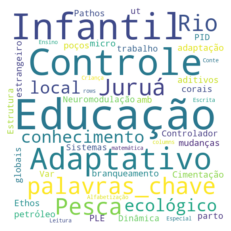

In [52]:
#hide_input
wordcloud = WordCloud(width=550, height=550, background_color="white", stopwords=stopwords_pt).generate(str(palavras_chave))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
pd.get_dummies(df_nan['linha_pesquisa']).shape

(20003, 7783)

In [54]:
pd.get_dummies(df_nan['palavras_chave']).shape

(20003, 12967)

In [56]:
#hide
pip install feature-engine

     |████████████████████████████████| 153kB 20.0MB/s 
     |████████████████████████████████| 9.5MB 16.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [57]:
#hide
from sklearn.model_selection import train_test_split

from feature_engine.encoding import CountFrequencyEncoder



In [58]:
#hide
df_nan.head()

,Unnamed: 0,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq
0,0,134094250,Cascading consequences of hunting and fishing ...,Pesca; Rio Juruá; conhecimento ecológico local...,2019,EM EXECUÇÃO,DEPARTAMENTO DE ECOLOGIA,Ecologia Humana,20502001
1,1,134475410,SAÚDE DO HIDROCORAL Millepora alcicornis: EFEI...,"branqueamento de corais, mudanças globais, amb...",2019,EM EXECUÇÃO,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,Ecologia Marinha,20502001
2,2,133516110,Desenvolvimento de aditivos químicos e sistema...,"Cimentação, poços de petróleo, aditivos, micro...",2019,EM EXECUÇÃO,INSTITUTO DE QUÍMICA,"Gênero, ciência e tecnologia",10601074
3,3,133419744,Ethos e pathos na formação da sensibilidade in...,Ethos; Pathos; PLE; adaptação; estrangeiro,2019,RENOVADO,DEPARTAMENTO DE LINGUAS E LITERATURAS ESTRANGE...,Ensino-aprendizagem de Línguas Estrangeiras,80106005
4,4,134916342,INFLUÊNCIA DA NEUROMODULAÇÃO NA DINÂMICA UTERI...,"Neuromodulação, trabalho de parto, Dinâmica ut...",2019,EM EXECUÇÃO,DEPARTAMENTO DE FISIOTERAPIA,Grupo de Estudo em Saúde da Mulher,40900002


In [59]:
#hide
df3 = df_nan[['palavras_chave','linha_pesquisa','area_conhecimento_cnpq']]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(['area_conhecimento_cnpq'], axis=1),
                df3['area_conhecimento_cnpq'], test_size=0.3, random_state=0)

### Test Encoding

In [60]:
encoder = CountFrequencyEncoder(encoding_method='frequency',
                         variables=['palavras_chave', 'linha_pesquisa'])

In [243]:
X_train.head()

,palavras_chave,linha_pesquisa
12930,"Caracterização, Geoquímica, Zona-reservatório",Corrosão e incrustação
9030,"acerola, secagem, funcionalidade, impacto",Desidratação de frutas e hortaliças;Cinética d...
14677,Ação Coletiva;Rede Sociais;Assentamento Rural,Educação e movimentos sociais;Educação ambient...
18864,lantanídeos;acetato de etila;espectroscopia el...,Campos de Coordenação;Espectroscopia Eletrônic...
10335,Saúde do homem- Saúde da Família- Estratégia S...,Saúde de grupos populacionais


In [244]:
encoder.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['palavras_chave', 'linha_pesquisa'])

In [74]:
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/base_encoder.py:142: UserWarning:

NaN values were introduced in the returned dataframe by the encoder.This means that some of the categories in the input dataframe were not present in the training set used when the fit method was called. Thus, mappings for those categories do not exist. Try using the RareLabelCategoricalEncoder to remove infrequent categories before calling this encoder.



In [245]:
#hide
encoder.encoder_dict_

{'linha_pesquisa': {';;;': 0.014283673760891302,
  'Robótica': 0.0017854592201114127,
  'Biologia do Desenvolvimento e Tecidual': 0.0017140408513069561,
  'Desenvolvimento tecnológico em saúde e enfermagem': 0.001571204113698043,
  'Práticas Pedagógicas e Currículo': 0.0014997857448935867,
  'Práticas Pedagógicas e Currículo;;;': 0.001285530638480217,
  'Câncer oral': 0.0012141122696757605,
  'Metalurgia do Pó e Sinterização;Materiais Compósitos;Materiais Super Duros;Metal Duro': 0.0012141122696757605,
  'Discurso, gramática e ensino': 0.0012141122696757605,
  'Desenvolvimento de Formas farmacêuticas Sólidas;Desenvolvimento de Sistemas de Liberação Controlada;;': 0.0012141122696757605,
  'Anemias hereditárias;;;': 0.0011426939008713042,
  'Modelos de regressão': 0.0011426939008713042,
  'Trabalho, Proteção Social e Cidadania;;;': 0.0011426939008713042,
  'Avaliação in vitro, in situ e in vivo de materiais dentários e técnicas restauradoras': 0.0011426939008713042,
  'Projeto de Arquite

In [77]:
#hide
df_nan['palavras_chave'].value_counts()

;;                                                                                     184
lectinas;defesa;heparina                                                                10
x;x;x                                                                                    9
Educação, História e Memória;Processos educativos;Atores e Instituições educativas       8
Engenharia ambiental;Tratamento de efluentes;Novas tecnologias                           8
                                                                                      ... 
Perícias contábeis. Remunerações. Cálculos precatórios                                   1
Formação de professores. Educação linguística. Gramática Sistêmico-Funcional             1
Fármacos; Medicamentos; Estabilidade; Degradação; Métodos de análise                     1
INFLAÇÃO - CESTA BÁSICA - CURRAIS NOVOS                                                  1
Teatro; Ritual; Liminaridade; Cena Quântica; Arte do Encontro;                           1

In [89]:
#hide
count_linhas = df_nan['linha_pesquisa'].value_counts()

In [171]:
#hide
count_linhas_unidade = df_nan['unidade'].value_counts()

In [140]:
#hide
count_linhas.values #.index

array([301,  37,  31, ...,   1,   1,   1])

In [175]:
#hide
count_linhas_unidade.values

CENTRO DE CIÊNCIAS DA SAÚDE                                                  1157
CT VICE-DIRETORIA                                                            1112
CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES                                   1004
CENTRO DE CIÊNCIAS EXATAS E DA TERRA                                          922
CENTRO DE BIOCIÊNCIAS                                                         819
                                                                             ... 
PROGRAMA DE PÓS-GRADUAÇÃO EM ARTES CÊNICAS                                      1
PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS ODONTOLÓGICAS                             1
PROGRAMA DE PÓS-GRADUAÇÃO EM PATOLOGIA ORAL                                     1
CURSO DE ESPECIALIZAÇÃO EM LÍNGUA PORTUGUESA: GRAMÁTICA, TEXTO E DISCURSO       1
COORDENAÇÃO DO CURSO DE PEDAGOGIA                                               1
Name: unidade, Length: 257, dtype: int64

In [124]:
#hide
idx = count_linhas[count_linhas.gt(10)].index

In [127]:
#hide
np.shape(idx)

(130,)

In [128]:
#hide
values = count_linhas.where(count_linhas >10).values

In [130]:
#hide
values_nan = [x for x in values if str(x) != 'nan']

In [131]:
#hide
np.shape(values_nan)

(130,)

In [206]:
#hide
df_nan

,Unnamed: 0,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq
0,0,134094250,Cascading consequences of hunting and fishing ...,Pesca; Rio Juruá; conhecimento ecológico local...,2019,EM EXECUÇÃO,22,4,20502001
1,1,134475410,SAÚDE DO HIDROCORAL Millepora alcicornis: EFEI...,"branqueamento de corais, mudanças globais, amb...",2019,EM EXECUÇÃO,111,3,20502001
2,2,133516110,Desenvolvimento de aditivos químicos e sistema...,"Cimentação, poços de petróleo, aditivos, micro...",2019,EM EXECUÇÃO,196,1,10601074
3,3,133419744,Ethos e pathos na formação da sensibilidade in...,Ethos; Pathos; PLE; adaptação; estrangeiro,2019,RENOVADO,82,4,80106005
4,4,134916342,INFLUÊNCIA DA NEUROMODULAÇÃO NA DINÂMICA UTERI...,"Neuromodulação, trabalho de parto, Dinâmica ut...",2019,EM EXECUÇÃO,364,2,40900002
...,...,...,...,...,...,...,...,...,...
20374,21364,35745,Implementação de Controladores Adaptativos Rob...,Controle Adaptativo;Sistemas com Estrutura Var...,2000,FINALIZADO,1112,15,30405009
20375,21365,35746,Controlador de Nível Adaptativo Aplicado a um ...,Controlador PID;Controle Adaptativo;Controle d...,2000,FINALIZADO,1112,15,30405009
20376,21368,35799,As concepções de professoras sobre linguagem e...,Educação Infantil;Alfabetização;Leitura e Escrita,2000,FINALIZADO,22,1,70804001
20377,21369,36010,Diferenças especiais de crianças e trabalho pe...,Educação Especial;Educação Infantil;Ensino e A...,2000,FINALIZADO,22,1,70804001


In [208]:
#hide
df_nomes =  df_final[['unidade','linha_pesquisa','area_conhecimento_cnpq']]

In [261]:
#hide_input
df_nomes

,unidade,linha_pesquisa,area_conhecimento_cnpq
0,DEPARTAMENTO DE ECOLOGIA,Ecologia Humana,20502001
1,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,Ecologia Marinha,20502001
2,INSTITUTO DE QUÍMICA,"Gênero, ciência e tecnologia",10601074
3,DEPARTAMENTO DE LINGUAS E LITERATURAS ESTRANGE...,Ensino-aprendizagem de Línguas Estrangeiras,80106005
4,DEPARTAMENTO DE FISIOTERAPIA,Grupo de Estudo em Saúde da Mulher,40900002
...,...,...,...
20374,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009
20375,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009
20376,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,ALFABETIZAÇÃO;LEITURA E ESCRITA;ENSINO E APREN...,70804001
20377,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,Educação Especial;Educação Infantil;Diversidad...,70804001


In [214]:
#hide
df_nan['new_linha'] = df_nan.linha_pesquisa.map(df_nan.linha_pesquisa.value_counts().astype(int))

In [212]:
#hide
df_final['new_linha'] = df_final.linha_pesquisa.map(df_final.linha_pesquisa.value_counts())

In [177]:
#hide
df_nan.unidade = df_nan.unidade.map(df_nan.unidade.value_counts())

In [215]:
#hide
df_final

,Unnamed: 0,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq,new_linha
0,0,134094250,Cascading consequences of hunting and fishing ...,Pesca; Rio Juruá; conhecimento ecológico local...,2019,EM EXECUÇÃO,DEPARTAMENTO DE ECOLOGIA,Ecologia Humana,20502001,4.0
1,1,134475410,SAÚDE DO HIDROCORAL Millepora alcicornis: EFEI...,"branqueamento de corais, mudanças globais, amb...",2019,EM EXECUÇÃO,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,Ecologia Marinha,20502001,3.0
2,2,133516110,Desenvolvimento de aditivos químicos e sistema...,"Cimentação, poços de petróleo, aditivos, micro...",2019,EM EXECUÇÃO,INSTITUTO DE QUÍMICA,"Gênero, ciência e tecnologia",10601074,1.0
3,3,133419744,Ethos e pathos na formação da sensibilidade in...,Ethos; Pathos; PLE; adaptação; estrangeiro,2019,RENOVADO,DEPARTAMENTO DE LINGUAS E LITERATURAS ESTRANGE...,Ensino-aprendizagem de Línguas Estrangeiras,80106005,4.0
4,4,134916342,INFLUÊNCIA DA NEUROMODULAÇÃO NA DINÂMICA UTERI...,"Neuromodulação, trabalho de parto, Dinâmica ut...",2019,EM EXECUÇÃO,DEPARTAMENTO DE FISIOTERAPIA,Grupo de Estudo em Saúde da Mulher,40900002,2.0
...,...,...,...,...,...,...,...,...,...,...
20374,21364,35745,Implementação de Controladores Adaptativos Rob...,Controle Adaptativo;Sistemas com Estrutura Var...,2000,FINALIZADO,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009,15.0
20375,21365,35746,Controlador de Nível Adaptativo Aplicado a um ...,Controlador PID;Controle Adaptativo;Controle d...,2000,FINALIZADO,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009,15.0
20376,21368,35799,As concepções de professoras sobre linguagem e...,Educação Infantil;Alfabetização;Leitura e Escrita,2000,FINALIZADO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,ALFABETIZAÇÃO;LEITURA E ESCRITA;ENSINO E APREN...,70804001,1.0
20377,21369,36010,Diferenças especiais de crianças e trabalho pe...,Educação Especial;Educação Infantil;Ensino e A...,2000,FINALIZADO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,Educação Especial;Educação Infantil;Diversidad...,70804001,1.0


In [223]:
#hide
df_merge = df_final.loc[df_final['new_linha'] > 10]

In [225]:
#hide
df_merge['cluster'] = kmeans.labels_

In [226]:
#hide
df_merge

,Unnamed: 0,id_projeto_pesquisa,titulo,palavras_chave,ano,situacao,unidade,linha_pesquisa,area_conhecimento_cnpq,new_linha,cluster
36,36,134253261,Efeito da Dieta Cardioprotetora Brasileira e n...,Doença Arterial Coronariana; Infarto do Miocár...,2019,RENOVADO,DEPARTAMENTO DE NUTRIÇÃO,Estudos relacionados à nutrição e ao estado nu...,40501000,15.0,2
107,112,129300124,Avaliação preliminar da qualidade da carne de ...,"Nitrito, hambúrguer, aditivos",2018,FINALIZADO,DEPARTAMENTO DE ANÁLISES CLÍNICAS E TOXICOLÓGICAS,Análises Toxicológicas,40303004,14.0,1
108,113,129299720,Análise do teor do aditivo alimentar Nitrito d...,"Presunto, nitrito, aditivos",2018,FINALIZADO,DEPARTAMENTO DE ANÁLISES CLÍNICAS E TOXICOLÓGICAS,Análises Toxicológicas,40303004,14.0,1
112,117,129416190,Determinação de arsênio total em amostras de c...,"Arsênio, Cação, espectrofotometria",2018,FINALIZADO,DEPARTAMENTO DE ANÁLISES CLÍNICAS E TOXICOLÓGICAS,Análises Toxicológicas,40303004,14.0,1
176,182,129489220,Microencapsulação de Bactérias Lácticas para a...,"Bactérias probióticas, microcápsulas, leite fe...",2018,RENOVADO,DEPARTAMENTO DE ENGENHARIA QUIMICA,50701037,50703021,14.0,3
...,...,...,...,...,...,...,...,...,...,...,...
20368,21353,35731,Estudo ambiental de Caracterização dos Lodos d...,lodos;águas residuárias;monitoramento ambiental,2000,FINALIZADO,CT VICE-DIRETORIA,;;;,60201002,301.0,0
20369,21355,35733,Projeto e Construção de um Sistema de Transmis...,;;,2000,FINALIZADO,CT VICE-DIRETORIA,;;;,30504007,301.0,0
20370,21358,35736,Veículo Híbrico Elétrico Gás Natural,;;,2000,FINALIZADO,CT VICE-DIRETORIA,;;;,30504007,301.0,0
20374,21364,35745,Implementação de Controladores Adaptativos Rob...,Controle Adaptativo;Sistemas com Estrutura Var...,2000,FINALIZADO,CT VICE-DIRETORIA,Automação Industrial e Controle de Processos;;;,30405009,15.0,4


In [ ]:
#hide
plt.scatter(df_merge['cluster'], df_merge['area_conhecimento_cnpq'])

In [239]:
#hide
df_process = df_nan[['unidade','linha_pesquisa','area_conhecimento_cnpq']]

In [237]:
#hide_output
df_filtered = df_process.loc[df_process['linha_pesquisa'] > 10]

In [241]:
#hide
df_filtered.head()

,unidade,linha_pesquisa,area_conhecimento_cnpq
36,190,15,40501000
107,322,14,40303004
108,322,14,40303004
112,322,14,40303004
176,482,14,50703021


In [184]:
#hide_output
X = np.array(df_filtered.drop(['area_conhecimento_cnpq'], 1))

In [222]:
np.shape(X)

(2240, 2)

In [218]:
#hide_output
kmeans = KMeans(n_clusters=8).fit(X)

In [219]:
centroides = np.array(kmeans.cluster_centers_)
centroides

array([[1065.46195652,  301.        ],
       [ 322.88969259,   15.05424955],
       [ 198.07373272,   36.0483871 ],
       [ 551.1375    ,   17.296875  ],
       [1140.09090909,   14.33333333],
       [ 711.82608696,  301.        ],
       [ 106.89757412,   15.38005391],
       [ 939.50413223,   14.76033058]])

In [187]:
#hide_output
centroides = kmeans.cluster_centers_

In [189]:
#hide_output
y = kmeans.predict(X)

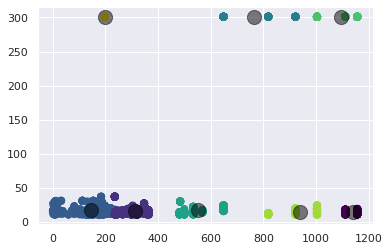

In [190]:
#hide_input
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

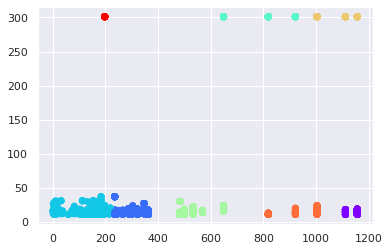

In [193]:
#hide_input
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

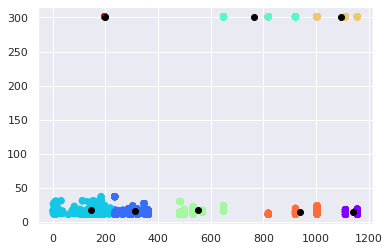

In [194]:
#hide_input
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [197]:
#hide
def doKmeans(X, nclust=8):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df_filtered, 8)
kmeans = pd.DataFrame(clust_labels)
df_filtered.insert((df_filtered.shape[1]),'kmeans',kmeans)

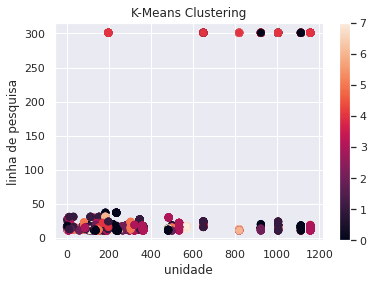

In [203]:
#hide
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_filtered['unidade'],df_filtered['linha_pesquisa'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('unidade')
ax.set_ylabel('linha de pesquisa')
plt.colorbar(scatter)

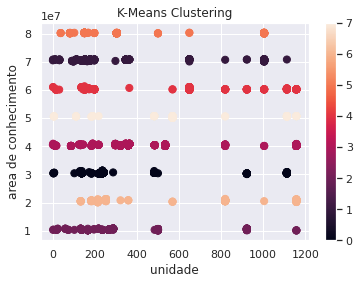

In [202]:
#hide
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_filtered['unidade'],df_filtered['area_conhecimento_cnpq'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('unidade')
ax.set_ylabel('area de conhecimento')
plt.colorbar(scatter)